### Este Notebook apenas ilustra como chegamos até a amostra ideal, aplicando os critérios

- Criterio 1: possuir decomposicao na banda de 3.6μm

- Critério 2: possuir barra em sua decomposição

- Critério 3: inclinação da galáxia menor que 65 graus

- Critério 4: melhor qualidade de decomposição possível

- Critério 5: possui valor de distância no catálogo S4G

- Critério Extra: excluir modelos que possuíssem um disco secundário

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')
SaloButa_S4G 

/tmp/ipykernel_22968/2501091324.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')


,#Seq,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,q1,...,__F_,__Type_,S10,Opt,AC,_RA,_DE,GroupID,GroupSize,Separation
0,#0,1,2,3,4,5,6,7.000,8.000,9.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ESO011-005,_bz,2,4,B,sersic,0.571,14.822,0.354,...,0.50,SAB:(s:)\underline{d}m sp,1.0,0.0,NaN,325.24350,-82.79967,19.0,2.0,1.235304
2,1,ESO011-005,_bz,2,4,Z,edgedisk,NaN,NaN,NaN,...,0.50,SAB:(s:)\underline{d}m sp,1.0,0.0,NaN,325.24350,-82.79967,19.0,2.0,1.235304
3,2,ESO012-010,_dbar,2,5,D,expdisk,NaN,NaN,NaN,...,0.75,SA\underline{B}(s)d,1.0,0.0,F,359.11500,-81.56639,70.0,2.0,2.619692
4,2,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,...,0.75,SA\underline{B}(s)d,1.0,0.0,F,359.11500,-81.56639,70.0,2.0,2.619692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,2351,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,NaN,...,1.00,SB:b: spw pec,1.0,1.0,NaN,359.19803,1.35510,35.0,3.0,0.604174
4626,2351,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,NaN,...,1.00,SB:b: spw pec,1.0,1.0,NaN,359.19803,1.35510,35.0,3.0,0.604174
4627,2351,UGC12857,_zzn,3,4,N,psf,NaN,NaN,NaN,...,1.00,SB:b: spw pec,1.0,1.0,NaN,359.19803,1.35510,35.0,3.0,0.604174
4628,2352,UGC12893,_bd,2,5,B,sersic,0.021,17.826,0.786,...,0.00,dSA(l)0^o^ / Sph,1.0,1.0,NaN,0.11866,17.22030,1254.0,2.0,6.770395


In [3]:
#Definindo colunas de interesse 
Colunas_interesse = SaloButa_S4G[['Name_1','Mod','Nc','Q','C','Fn','f1','mag1_1','f2','mu02','f3',
                                  'mag3','f4','mu04','f5','mag5','mag1_2','mag2',
                                  'mstar','dmean','type','t_1','incl','Dist','__T_','__F_']]  

In [4]:
#Tirando as linhas duplicadas -- uma linha para cada componente do modelo
s4g_comps = Colunas_interesse.drop(index=0) #Removendo a primeira linha, que é apenas um indice que eu uso para me
#orientar com as colunas na tabela completa, pois são muitas colunas

s4g_2277 = s4g_comps.drop_duplicates(subset='Name_1')
s4g_2277

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
1,ESO011-005,_bz,2,4,B,sersic,0.571,14.822,NaN,NaN,...,14.592,15.063,9.749,51.680,SBc,5.9,83.91,NaN,7.5,0.50
3,ESO012-010,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
5,ESO012-014,_dbar,2,4,D,expdisk,NaN,NaN,NaN,NaN,...,14.959,15.578,9.023,23.400,SBm,9.0,90.00,NaN,NaN,NaN
7,ESO013-016,_dbarf,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
9,ESO015-001,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,14.762,15.168,8.806,19.950,IB,9.8,90.00,NaN,10.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,UGC12791,_d,1,5,D,expdisk,NaN,NaN,NaN,NaN,...,15.350,15.755,8.190,12.900,I,9.9,90.00,12.9,10.0,1.00
4622,UGC12846,_d,1,5,D,expdisk,NaN,NaN,NaN,NaN,...,15.534,15.975,8.687,24.100,SABm,8.7,25.66,24.1,9.0,0.38
4623,UGC12856,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,14.395,14.733,9.080,24.500,IB,9.6,90.00,24.5,NaN,NaN
4625,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,0.382,21.326,...,13.086,13.491,10.005,36.717,Sbc,4.0,90.00,36.7,3.0,1.00


In [5]:
#Critério 1: Tirando os NaNs da coluna com modelos de decomposição
s4g_nonan_mod = s4g_2277.dropna(subset = ['Mod'])
s4g_nonan_mod

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
1,ESO011-005,_bz,2,4,B,sersic,0.571,14.822,NaN,NaN,...,14.592,15.063,9.749,51.680,SBc,5.9,83.91,NaN,7.5,0.50
3,ESO012-010,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
5,ESO012-014,_dbar,2,4,D,expdisk,NaN,NaN,NaN,NaN,...,14.959,15.578,9.023,23.400,SBm,9.0,90.00,NaN,NaN,NaN
7,ESO013-016,_dbarf,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
9,ESO015-001,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,14.762,15.168,8.806,19.950,IB,9.8,90.00,NaN,10.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,UGC12791,_d,1,5,D,expdisk,NaN,NaN,NaN,NaN,...,15.350,15.755,8.190,12.900,I,9.9,90.00,12.9,10.0,1.00
4622,UGC12846,_d,1,5,D,expdisk,NaN,NaN,NaN,NaN,...,15.534,15.975,8.687,24.100,SABm,8.7,25.66,24.1,9.0,0.38
4623,UGC12856,_dbar,2,5,D,expdisk,NaN,NaN,NaN,NaN,...,14.395,14.733,9.080,24.500,IB,9.6,90.00,24.5,NaN,NaN
4625,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,0.382,21.326,...,13.086,13.491,10.005,36.717,Sbc,4.0,90.00,36.7,3.0,1.00


In [6]:
#Critério 2: Tirando todas as galáxias que não possuem barra em sua decomposição
s4g_bargals = s4g_comps[s4g_comps.C == 'BAR']
s4g_bargals = s4g_bargals.drop_duplicates(subset='Name_1')
s4g_bargals

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
6,ESO012-014,_dbar,2,4,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.959,15.578,9.023,23.400,SBm,9.0,90.00,NaN,NaN,NaN
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
10,ESO015-001,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.762,15.168,8.806,19.950,IB,9.8,90.00,NaN,10.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25
4620,UGC12732,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.854,14.189,8.703,12.400,SABm,8.7,26.57,12.4,8.0,0.50


,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


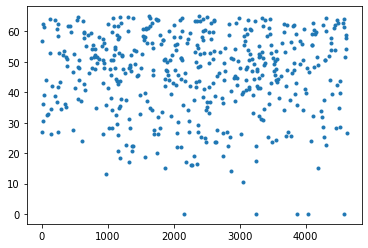

In [7]:
#Critério 3: Apenas galáxias com inclinação menor que 65 graus
s4g_bargals_i65 = s4g_bargals[s4g_bargals.incl < 65]
plt.plot(s4g_bargals_i65['incl'],'.')
s4g_bargals_i65

In [8]:
#Critério 4: Melhor qualidade de decomposição possível
s4g_bargals_i65_q5 = s4g_bargals_i65[s4g_bargals_i65.Q == 5]
s4g_bargals_i65_q5

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


In [9]:
#Critério 5: Possuir valor de distância
s4g_bargals_i65_q5_d = s4g_bargals_i65_q5.dropna(subset = ['dmean','Dist'],how='all')
s4g_bargals_i65_q5_d

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


In [10]:
mask1 = np.isnan(s4g_bargals_i65_q5_d['Dist']) #galáxias que possuem falor de distância apenas na coluna dmean

mask1
s4g_bargals_i65_q5_d['Dist'][mask1]

4      NaN
235    NaN
246    NaN
372    NaN
528    NaN
        ..
4271   NaN
4278   NaN
4371   NaN
4492   NaN
4615   NaN
Name: Dist, Length: 69, dtype: float64

In [11]:
mask2 = np.isnan(s4g_bargals_i65_q5_d['dmean']) #galáxias que possuem valor de distância apenas na coluna Dist

s4g_bargals_i65_q5_d[mask2]

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
75,ESO238-018,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.527,14.992,9.517,NaN,Sc,5.5,32.37,39.4,8.0,0.75
95,ESO287-037,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.594,13.938,9.693,NaN,SBm,8.5,32.77,34.6,8.0,0.62
128,ESO340-017,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.626,14.074,9.782,NaN,SBd,8.0,64.13,35.0,7.0,1.00
133,ESO341-032,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.692,14.094,9.763,NaN,SBm,9.0,26.27,36.8,8.5,0.50
240,ESO420-009,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.390,13.832,9.201,NaN,SBc,5.0,41.68,18.3,5.5,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,UGC09601,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.926,14.305,9.387,NaN,SBc,5.9,39.60,24.6,7.5,0.50
4517,UGC09661,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.775,14.232,9.180,NaN,SBd,8.0,28.46,16.6,8.0,1.00
4525,UGC09730,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.570,14.998,9.366,NaN,Scd,6.6,43.83,28.4,5.0,1.00
4577,UGC10791,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.371,14.869,9.148,NaN,SABm,8.8,0.00,17.7,6.5,0.75


In [12]:
s4g_bargals_i65_q5_d[~mask1][~mask2] #galáxias que possuem valor de distância nas duas colunas

/tmp/ipykernel_22968/2778903219.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s4g_bargals_i65_q5_d[~mask1][~mask2] #galáxias que possuem valor de distância nas duas colunas


,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
28,ESO079-007,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.570,13.956,9.471,25.220,SBbc,4.0,39.25,25.2,8.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,UGC11782,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.236,14.816,9.005,17.000,SBm,8.8,61.48,17.0,9.5,1.00
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


In [13]:
N_Dist = pd.concat([s4g_bargals_i65_q5_d[['Dist']][~mask1],s4g_bargals_i65_q5_d[['dmean']][mask1]])
N_Dist = N_Dist.sort_index(ascending=True)
N_Dist

,Dist,dmean
4,NaN,32.75
8,23.0,NaN
12,19.2,NaN
16,18.3,NaN
20,29.5,NaN
...,...,...
4593,23.8,NaN
4611,33.2,NaN
4615,NaN,41.40
4618,35.1,NaN


In [14]:
#s4g_bargals_i65_q5_d = s4g_bargals_i65_q5_d.fillna(value={'Dist': 0})

In [15]:
s4g_bargals_i65_q5_d

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


In [17]:
#Os cortes de massa
s4g_bar_i65_q5d_m9 = s4g_bargals_i65_q5_d[s4g_bargals_i65_q5_d.mstar < 9] #massa menor que 10^9 -- galáxias anãs
s4g_bar_i65_q5d_m9m = s4g_bargals_i65_q5_d[s4g_bargals_i65_q5_d.mstar >= 9]

In [18]:
print('Número de galáxias anãs: ', len(s4g_bar_i65_q5d_m9))

Número de galáxias anãs:  13


In [19]:
print('Número de galáxias massivas: ', len(s4g_bar_i65_q5d_m9m))

maskdd = s4g_bar_i65_q5d_m9m['Mod'].str.contains('dd')
print('Número de galáxias massivas com componente disco+disco: ',
      len(s4g_bar_i65_q5d_m9m[maskdd]))

s4g_bar_i65_q5d_m9m[maskdd]

Número de galáxias massivas:  431
Número de galáxias massivas com componente disco+disco:  14


,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
806,IC4901,_ddbarn,4,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.471,11.916,10.300,23.680,SABc,5.1,47.76,NaN,4.5,0.88
822,IC5069,_ddbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.953,14.392,9.671,NaN,SBb,3.4,34.92,37.6,NaN,NaN
1107,NGC1097,_ddbarf,4,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,8.702,9.117,11.240,20.038,SBb,3.3,54.95,20.0,2.2,1.00
1214,NGC1385,_ddbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,10.752,11.098,10.115,14.950,Sc,5.9,52.28,15.0,8.0,1.00
1373,NGC2537,_ddbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.727,12.170,9.247,7.940,SBm,8.7,22.19,7.9,9.0,1.00
1483,NGC2859,_bddbarf,4,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,10.467,10.988,10.882,27.333,S0-a,-1.2,32.94,27.3,-1.0,0.50
2116,NGC4141,_ddbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.487,14.992,9.353,NaN,SBc,6.0,51.33,25.4,7.5,0.88
2304,NGC4351,_ddbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,12.572,13.109,10.066,27.817,SBab,2.5,37.42,17.0,8.0,0.38
2611,NGC4668,_ddbarf,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.310,13.738,9.235,16.433,SBcd,7.4,63.85,16.4,9.0,0.88
2963,NGC5383,_ddbarfn,4,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.170,11.590,10.803,37.640,Sb,3.1,42.29,37.6,1.5,1.00


In [20]:
#Retirando modelos com dd
maskdd2 = s4g_bargals_i65_q5_d['Mod'].str.contains('dd')
s4g_bargals_i65_q5_d = s4g_bargals_i65_q5_d[~maskdd2]

s4g_bargals_i65_q5_d

,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,f2,mu02,...,mag1_2,mag2,mstar,dmean,type,t_1,incl,Dist,__T_,__F_
4,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.880,14.343,9.632,32.750,SBd,7.7,26.82,NaN,7.0,0.75
8,ESO013-016,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.127,13.506,9.564,23.017,SBd,7.5,56.71,23.0,6.0,1.00
12,ESO026-001,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,13.387,13.864,9.373,19.160,SBc,5.9,30.39,19.2,5.5,0.62
16,ESO027-001,_bdbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,11.515,11.879,9.999,18.308,SBc,5.0,36.30,18.3,3.5,0.75
20,ESO048-017,_ndbar,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.726,15.188,9.202,29.520,SBcd,6.9,62.52,29.5,9.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,UGC12151,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.122,14.662,9.314,23.800,IB,9.7,51.43,23.8,7.0,1.00
4611,UGC12681,_dbarf,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,15.074,15.374,9.043,33.150,SBbc,4.2,54.14,33.2,8.5,0.75
4615,UGC12707,_dbarfn,3,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.223,14.570,9.611,41.400,Sbc,3.9,57.72,NaN,5.5,0.75
4618,UGC12709,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,NaN,...,14.312,14.789,9.528,35.100,SABm,8.7,58.74,35.1,8.5,0.25


In [21]:
#Amostra final:
amostra_430 = s4g_bargals_i65_q5_d.to_csv('amostra_430.csv',index=False)